# Car Insurance Claims

## Importing Necessary Libraries 

In [1]:
#Importing the necessary libraries such as numpy, pandas, matplotlib, seaborn, scikit-learn, and scipy.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve,  precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn import tree

from scipy import stats

import warnings
warnings.filterwarnings('ignore')


## Loading and Exploring the Dataset

In [2]:
# load dataset into dataframe (rows and columns) and display first five rows
car_df = pd.read_csv("Car_Insurance_Claim.csv")
car_df.head(5)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [3]:
#Dimension of the dataframe
car_df.shape

(10000, 19)

In [4]:
#columns in dataframe
car_df.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [5]:
#information about the dataset
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [6]:
#overview of the variable types
car_df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [7]:
#statistics of the numerical features in the data
car_df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [8]:
#checking for missing values
car_df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [9]:
# Dropping missing values
car_df.dropna(inplace=True)

In [10]:
#checking for duplicate values
car_df.duplicated().sum()

0

In [11]:
car_df.drop(['ID'], axis=1, inplace=True)
car_df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,26-39,male,majority,10-19y,high school,middle class,0.454300,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,1,0,2,0.0
9995,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [12]:
car_df.shape

(8149, 18)

## Univariate Analysis

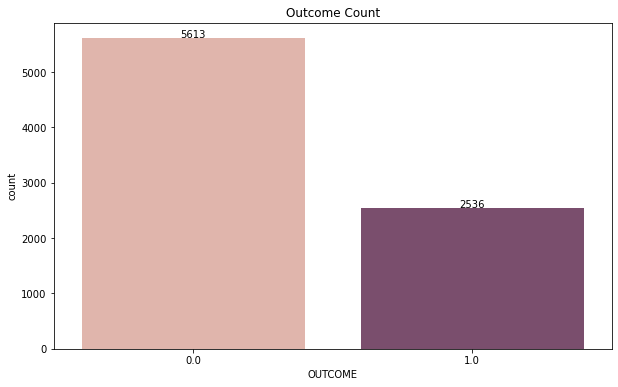

In [13]:
# plotting the countplot of the target variable
plt.figure(figsize=(10,6))
plt.title("Outcome Count")
count = sns.countplot(data=car_df, x ="OUTCOME", palette=["#E9AFA3","#824670"])
for patch in count.patches:
    count.text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 20, "{:.0f}".format(patch.get_height()), ha="center")

In [14]:
car_df.OUTCOME.value_counts()

0.0    5613
1.0    2536
Name: OUTCOME, dtype: int64

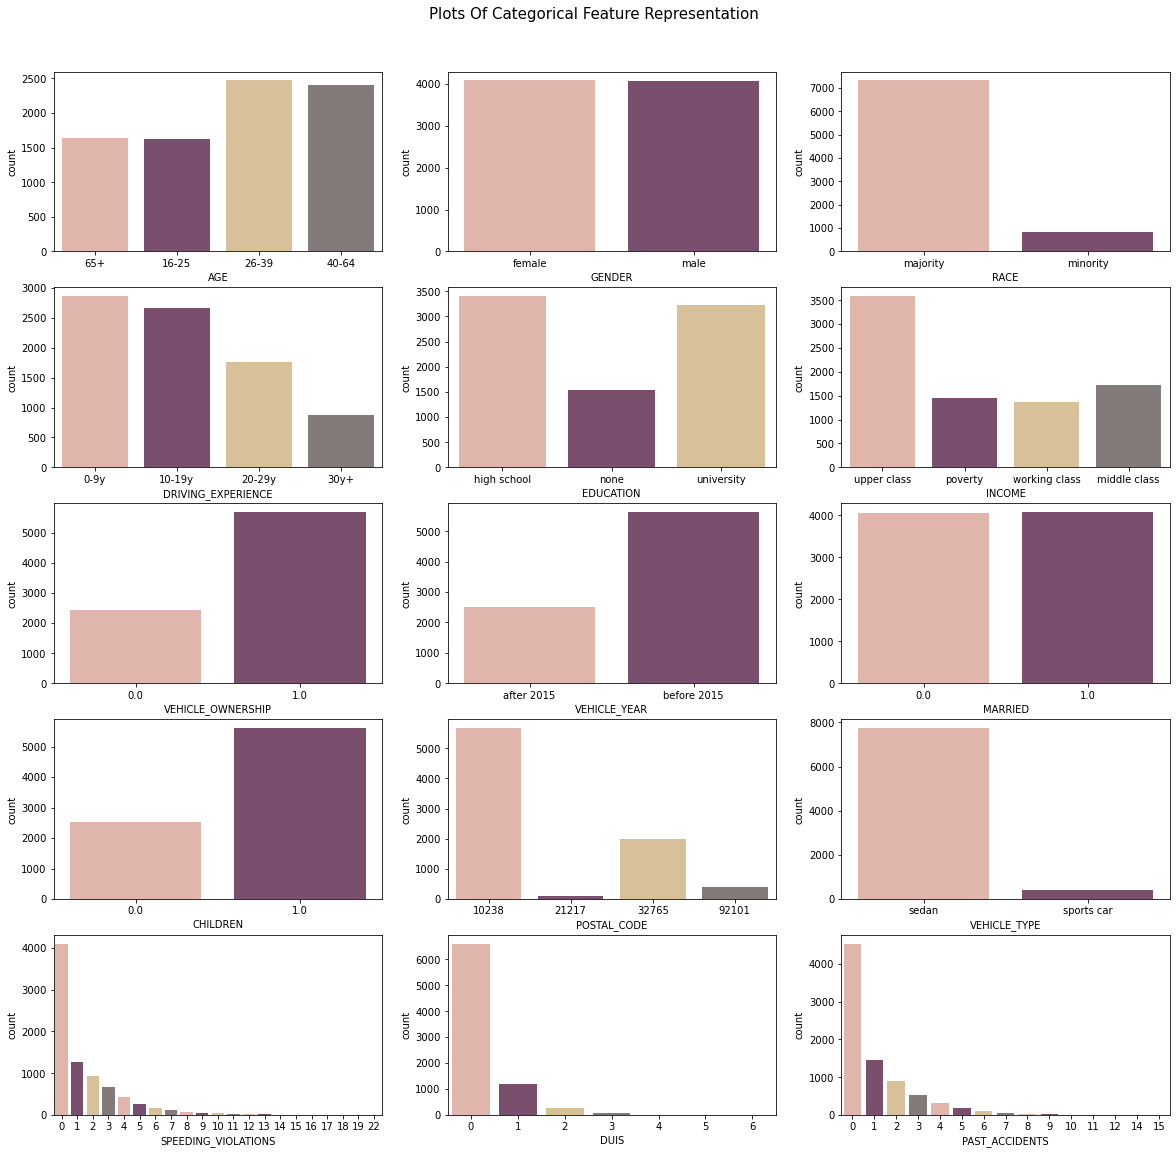

In [15]:
cat_features = car_df.drop(["CREDIT_SCORE", "ANNUAL_MILEAGE"], axis=1)

fig , ax = plt.subplots(5,3,figsize = (20,18))   
for i , subplots in zip (cat_features, ax.flatten()):
    sns.countplot(cat_features[i],ax = subplots, palette=["#E9AFA3","#824670", "#E2C290", "#847979"])
fig.suptitle("Plots Of Categorical Feature Representation", fontsize = 15)
fig.subplots_adjust(top=0.93)
plt.show()

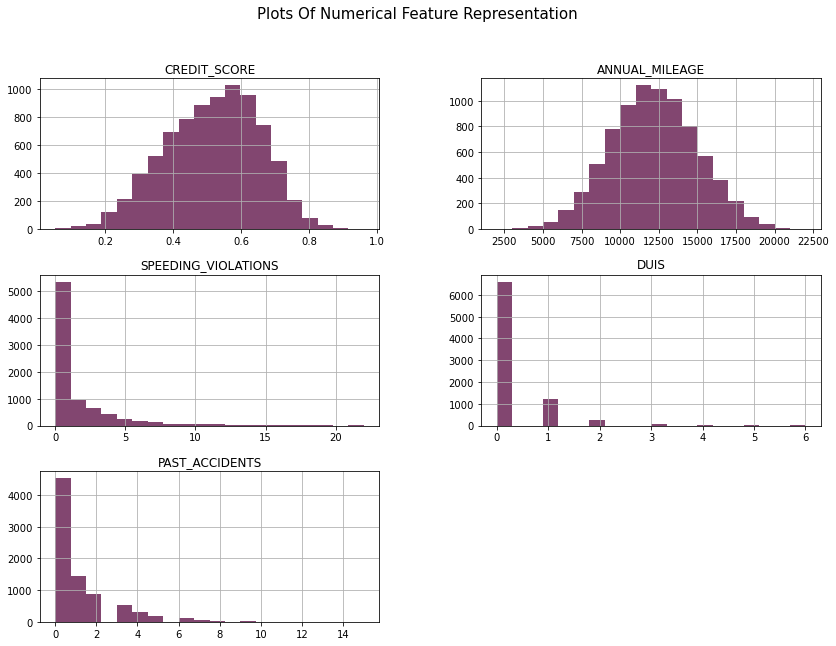

In [16]:
num_features = car_df[["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS", "DUIS", "PAST_ACCIDENTS"]]

# Plotting the histograms of data
fig, ax = plt.subplots(figsize = (14,10))
num_features.hist(bins = 20, ax=ax, color="#824670")
plt.ylabel("Frequency")
fig.suptitle("Plots Of Numerical Feature Representation", fontsize = 15)
plt.show()

## Bivariate Analysis

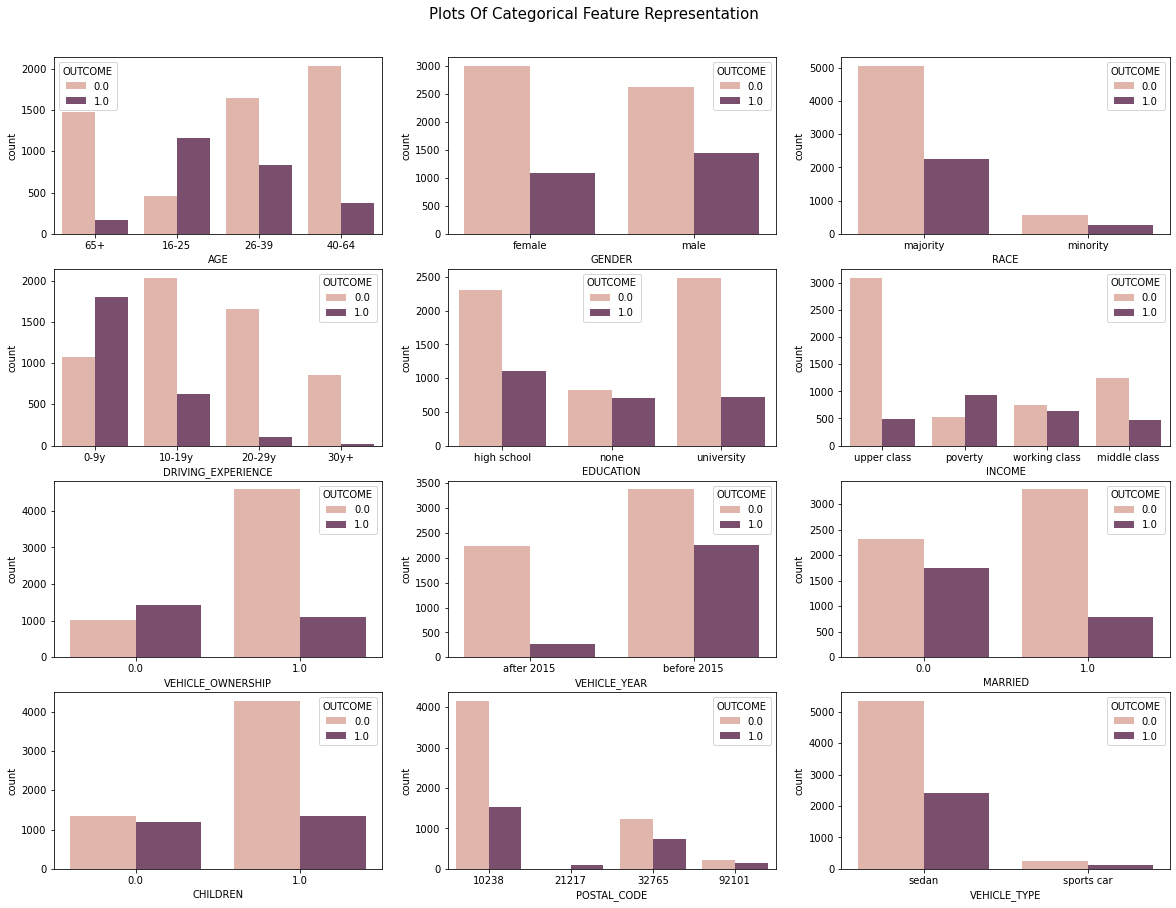

In [17]:
cat_features = car_df.drop(["CREDIT_SCORE", "ANNUAL_MILEAGE", "SPEEDING_VIOLATIONS"], axis=1)

fig , ax = plt.subplots(4,3,figsize = (20,14))    
for i , subplots in zip (cat_features, ax.flatten()):  
  sns.countplot(cat_features[i],hue = car_df["OUTCOME"],ax = subplots, palette=["#E9AFA3","#824670"])
fig.suptitle("Plots Of Categorical Feature Representation", fontsize = 15)
fig.subplots_adjust(top=0.93)
plt.show()

<Figure size 1152x648 with 0 Axes>

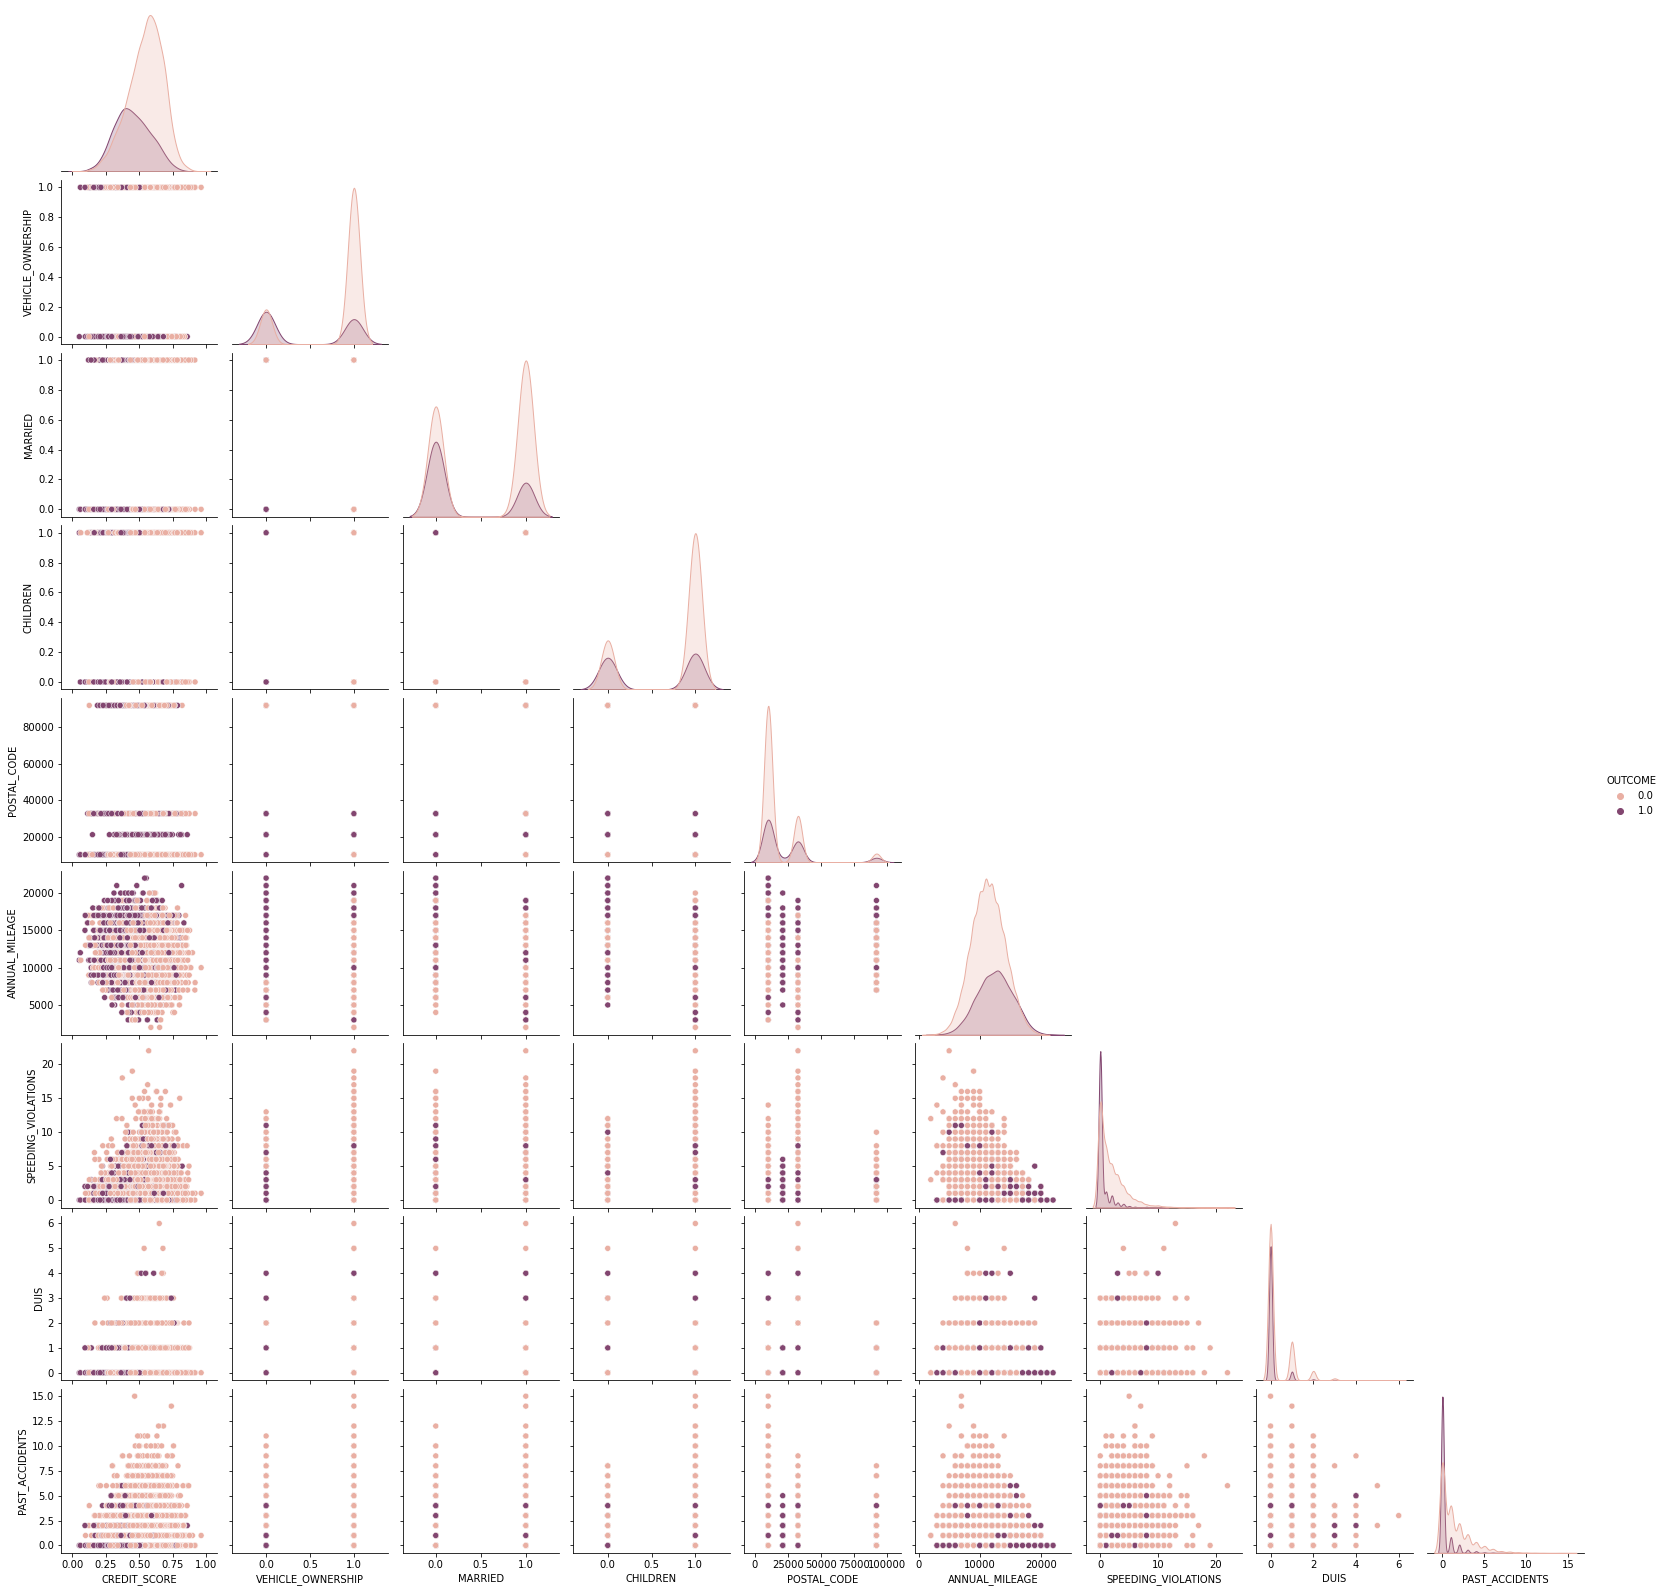

In [18]:
# pair plot of the attributes 
plt.figure(figsize=(16,9))
sns.pairplot(car_df, hue = "OUTCOME", palette=["#E9AFA3","#824670"], corner = True)
plt.show()

### Encoding Categorical Columns

In [19]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
car_df["AGE"] = labelencoder.fit_transform(car_df["AGE"])
car_df["GENDER"] = labelencoder.fit_transform(car_df["GENDER"])
car_df["RACE"] = labelencoder.fit_transform(car_df["RACE"])
car_df["DRIVING_EXPERIENCE"] = labelencoder.fit_transform(car_df["DRIVING_EXPERIENCE"])
car_df["EDUCATION"] = labelencoder.fit_transform(car_df["EDUCATION"])
car_df["INCOME"] = labelencoder.fit_transform(car_df["INCOME"])
car_df["VEHICLE_OWNERSHIP"] = labelencoder.fit_transform(car_df["VEHICLE_OWNERSHIP"])
car_df["MARRIED"] = labelencoder.fit_transform(car_df["MARRIED"])
car_df["CHILDREN"] = labelencoder.fit_transform(car_df["CHILDREN"])
car_df["VEHICLE_YEAR"] = labelencoder.fit_transform(car_df["VEHICLE_YEAR"])
car_df["VEHICLE_TYPE"] = labelencoder.fit_transform(car_df["VEHICLE_TYPE"])
car_df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,0,0,0,2,0.629027,1,0,0,1,10238,12000.0,0,0,0,0,0.0
1,0,1,0,0,1,1,0.357757,0,1,0,0,10238,16000.0,0,0,0,0,1.0
2,0,0,0,0,0,3,0.493146,1,1,0,0,10238,11000.0,0,0,0,0,0.0
3,0,1,0,0,2,3,0.206013,1,1,0,1,32765,11000.0,0,0,0,0,0.0
4,1,1,0,1,1,3,0.388366,1,1,0,0,32765,12000.0,0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1,1,0,1,0,0,0.454300,1,1,0,0,10238,16000.0,0,1,0,2,0.0
9995,1,0,0,1,2,2,0.582787,1,1,0,0,10238,16000.0,0,0,0,1,0.0
9997,1,1,0,0,0,0,0.470940,1,1,0,1,10238,14000.0,0,0,0,0,0.0
9998,1,0,0,1,0,1,0.364185,0,1,0,1,10238,13000.0,0,2,0,1,1.0


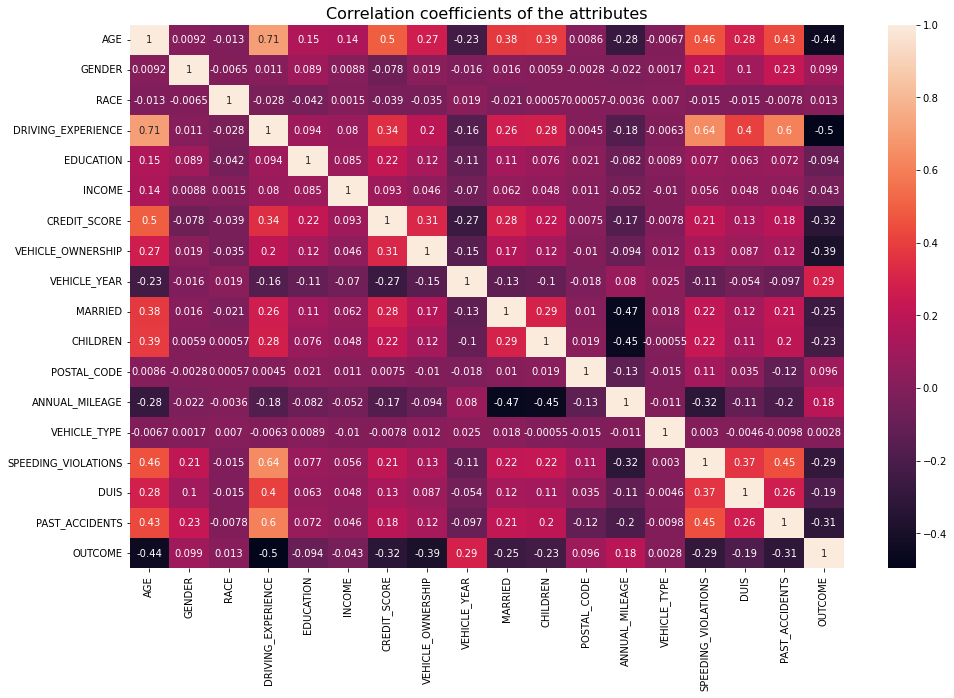

In [20]:
# correlation plot
plt.figure(figsize = (16,10))
sns.heatmap(car_df.corr(),annot = True, cmap = "rocket")

plt.title("Correlation coefficients of the attributes", fontsize = 16, c="black")
plt.show()

In [21]:
#Create the attribute and target data
X=car_df.drop(columns=["OUTCOME"],axis=1)
Y=car_df["OUTCOME"]


## Feature Scaling

In [22]:
#Split the data into training and test data using train_test_split() function. :
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)
print(X_train.shape,X_test.shape)

#import standard scalar
from sklearn.preprocessing import StandardScaler

# Applying the scaler to the training and test set
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)

X_test_scaled = scale.transform(X_test)



(6519, 17) (1630, 17)


In [23]:
#importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForestClassifier
RF = RandomForestClassifier(random_state=6)

# Train the model using the training sets
RF.fit(X_train_scaled, Y_train)

# checking for acurracy of the train test
train = RF.predict(X_train_scaled)
print("Random Forest Accuracy on training data: ", metrics.accuracy_score(Y_train, train))
print("Precision on training data:", metrics.precision_score(Y_train, train))
print("Recall on training data:", metrics.recall_score(Y_train, train))
print("F1 score on training data: ", metrics.f1_score(Y_train, train))


#print classification report of the train set for svm model
RF_report_train = classification_report(Y_train,train)
print(RF_report_train)


Random Forest Accuracy on training data:  1.0
Precision on training data: 1.0
Recall on training data: 1.0
F1 score on training data:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4490
         1.0       1.00      1.00      1.00      2029

    accuracy                           1.00      6519
   macro avg       1.00      1.00      1.00      6519
weighted avg       1.00      1.00      1.00      6519



In [24]:
# Evaluate using the testing data
test = RF.predict(X_test_scaled)
print(f"Accuracy on testing data: {metrics.accuracy_score(Y_test, test):.3f}")
print(f"Precision on testing data: {metrics.precision_score(Y_test, test):.3f}")
print(f"Recall on testing data: {metrics.recall_score(Y_test, test):.3f}")
print(f"F1 score on testing data: {metrics.f1_score(Y_test, test):.3f}")


#print classification report of the test set for svm model
RF_report = classification_report(Y_test,test)
print(RF_report)


Accuracy on testing data: 0.837
Precision on testing data: 0.755
Recall on testing data: 0.706
F1 score on testing data: 0.730
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      1123
         1.0       0.76      0.71      0.73       507

    accuracy                           0.84      1630
   macro avg       0.81      0.80      0.81      1630
weighted avg       0.84      0.84      0.84      1630



In [25]:
# Checking the cross validation score for Random Forest model
score = cross_val_score(RF,X,Y,cv=5)
print("Cross validation score:", score)

Cross validation score: [0.83865031 0.84723926 0.8398773  0.84785276 0.83916513]


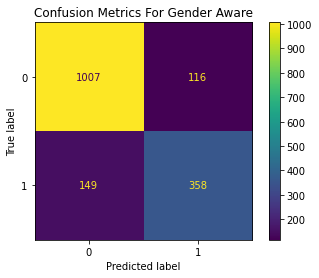

In [26]:
#display the confusion matrix
cm = metrics.confusion_matrix(Y_test, test)
TN, FP, FN, TP = cm.ravel()
#print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Metrics For Gender Aware")
plt.show()


In [27]:
importances = RF.feature_importances_
indices = np.argsort(importances)

# Get feature names
feature_names = car_df.columns

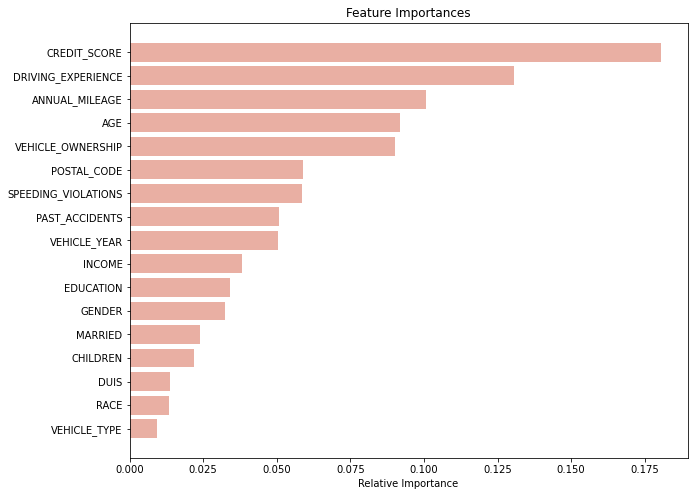

In [28]:
# Plot feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="#E9AFA3", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Persistence

In [29]:
# Import the required classes
from joblib import dump, load

In [30]:
# It is required to enable probabilities for the ML model to enable LIME to work 
model = RandomForestClassifier()
model.fit(X_train,Y_train)


RandomForestClassifier()

In [31]:
# Dump the model into a joblib file
dump(model, "RF_loan.joblib") 


['RF_loan.joblib']

In [32]:
# Load the new model(Load the joblib file when you need it instead of retraining the model)
model_from_file = load("RF_loan.joblib") 


## LIME Package

In [33]:
# Import the LIME package
import lime.lime_tabular


In [34]:
#Create an explainer using LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),feature_names=X_train.columns,verbose=True, mode="classification")


In [35]:
# Create an explanation for a prediction
explanation = explainer.explain_instance(X_test.iloc[0], model.predict_proba, num_features = 5)

# Show the results of the explanation in your notebook
explanation.show_in_notebook(show_table=True)


Intercept 0.545541302096812
Prediction_local [0.20837858]
Right: 0.06


In [36]:
explanation.as_list()

[('DRIVING_EXPERIENCE <= 0.00', 0.24941694359482977),
 ('0.00 < VEHICLE_OWNERSHIP <= 1.00', -0.20881181520234457),
 ('POSTAL_CODE <= 10238.00', -0.1454688561130499),
 ('VEHICLE_YEAR <= 0.00', -0.14137456520983638),
 ('GENDER <= 0.00', -0.09092443183645167)]

## Gender Unaware

In [37]:
Gender_minus = car_df.drop(columns=["GENDER"],axis=1)
Gender_minus

,AGE,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,0,0,2,0.629027,1,0,0,1,10238,12000.0,0,0,0,0,0.0
1,0,0,0,1,1,0.357757,0,1,0,0,10238,16000.0,0,0,0,0,1.0
2,0,0,0,0,3,0.493146,1,1,0,0,10238,11000.0,0,0,0,0,0.0
3,0,0,0,2,3,0.206013,1,1,0,1,32765,11000.0,0,0,0,0,0.0
4,1,0,1,1,3,0.388366,1,1,0,0,32765,12000.0,0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1,0,1,0,0,0.454300,1,1,0,0,10238,16000.0,0,1,0,2,0.0
9995,1,0,1,2,2,0.582787,1,1,0,0,10238,16000.0,0,0,0,1,0.0
9997,1,0,0,0,0,0.470940,1,1,0,1,10238,14000.0,0,0,0,0,0.0
9998,1,0,1,0,1,0.364185,0,1,0,1,10238,13000.0,0,2,0,1,1.0


In [38]:
#Create the attribute and target data
X_gender = Gender_minus.drop(columns=["OUTCOME"],axis=1)
Y_gender = Gender_minus["OUTCOME"]

In [39]:
#Split the data into training and test data using train_test_split() function. :
X_train_g,X_test_g,Y_train_g,Y_test_g=train_test_split(X_gender,Y_gender,test_size=0.2, stratify=Y, random_state=2)
print(X_train.shape,X_test.shape)

#import standard scalar
from sklearn.preprocessing import StandardScaler

# Applying the scaler to the training and test set
scale = StandardScaler()
X_train_g = scale.fit_transform(X_train_g)

X_test_g = scale.transform(X_test_g)


(6519, 17) (1630, 17)


In [40]:
#Create a RandomForestClassifier
RF = RandomForestClassifier(random_state=8)

# Train the model using the training sets
RF.fit(X_train_g, Y_train_g)

# checking for acurracy of the train test
train_g = RF.predict(X_train_g)
print("Random Forest Accuracy on training data: ", metrics.accuracy_score(Y_train_g, train_g))
print("Precision on training data:", metrics.precision_score(Y_train_g, train_g))
print("Recall on training data:", metrics.recall_score(Y_train_g, train_g))
print("F1 score on training data: ", metrics.f1_score(Y_train_g, train_g))


#print classification report of the train set for svm model
g_report = classification_report(Y_train_g,train_g)
print(g_report)


Random Forest Accuracy on training data:  1.0
Precision on training data: 1.0
Recall on training data: 1.0
F1 score on training data:  1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4490
         1.0       1.00      1.00      1.00      2029

    accuracy                           1.00      6519
   macro avg       1.00      1.00      1.00      6519
weighted avg       1.00      1.00      1.00      6519



In [41]:
# Evaluate using the testing data
test_g = RF.predict(X_test_g)
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test_g, test_g))
print("Precision on testing data:", metrics.precision_score(Y_test_g, test_g))
print("Recall on testing data: ", metrics.recall_score(Y_test_g, test_g))
print("F1 score on testing data: ", metrics.f1_score(Y_test_g, test_g))


#print classification report of the test set for svm model
g_test_report = classification_report(Y_test_g,test_g)
print(g_test_report)


Accuracy on testing data:  0.8319018404907975
Precision on testing data: 0.7412008281573499
Recall on testing data:  0.7061143984220908
F1 score on testing data:  0.7232323232323233
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1123
         1.0       0.74      0.71      0.72       507

    accuracy                           0.83      1630
   macro avg       0.81      0.80      0.80      1630
weighted avg       0.83      0.83      0.83      1630



In [42]:
# Evaluate using the testing data
test_g = RF.predict(X_test_g)
print(f"Accuracy on testing data: {metrics.accuracy_score(Y_test_g, test_g):.3f}")
print(f"Precision on testing data: {metrics.precision_score(Y_test_g, test_g):.3f}")
print(f"Recall on testing data: {metrics.recall_score(Y_test_g, test_g):.3f}")
print(f"F1 score on testing data: {metrics.f1_score(Y_test_g, test_g):.3f}")


#print classification report of the test set for svm model
g_test_report = classification_report(Y_test_g,test_g)
print(g_test_report)


Accuracy on testing data: 0.832
Precision on testing data: 0.741
Recall on testing data: 0.706
F1 score on testing data: 0.723
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1123
         1.0       0.74      0.71      0.72       507

    accuracy                           0.83      1630
   macro avg       0.81      0.80      0.80      1630
weighted avg       0.83      0.83      0.83      1630



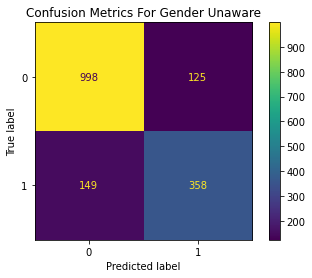

In [43]:
#display the confusion matrix for gender unaware
cm_g = metrics.confusion_matrix(Y_test_g, test_g)
TN_g, FP_g, FN_g, TP_g = cm_g.ravel()
#print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_g, FP_g, FN_g, TP_g))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_g)
disp.plot()
plt.title("Confusion Metrics For Gender Unaware")
plt.show()


In [44]:
## Splitting the True and Predicted Values into Male and Female Groups
PROTECTED  =  "GENDER" 
MALE =  1.0 #male 
FEMALE = 0.0 #female
male_indices = np.where(X_test[PROTECTED] == MALE)[0]
female_indices = np.where(X_test[PROTECTED] == FEMALE)[0]
print(male_indices, "No of Male =", male_indices.size)
print(female_indices, "No of Female =", female_indices.size)

[   1    2    3    4    5    7   11   12   14   15   18   19   20   21
   22   23   25   28   30   31   33   34   35   36   40   44   45   46
   47   48   49   50   52   53   56   57   61   62   64   65   69   73
   74   75   78   79   84   85   88   89   90   92   94   95   96   97
   98   99  100  102  103  106  111  118  119  121  122  124  125  128
  134  135  138  139  140  142  145  146  147  149  152  154  159  160
  162  163  164  165  166  167  168  169  170  178  181  183  184  189
  190  191  192  194  196  197  202  203  204  205  206  207  212  213
  214  217  221  222  224  227  235  241  249  250  251  252  254  256
  257  261  268  269  270  271  274  276  277  278  279  280  284  285
  286  287  289  291  292  293  295  296  297  299  302  304  306  307
  308  309  310  312  316  319  321  324  325  326  329  333  335  337
  338  339  341  342  343  345  346  348  356  357  358  359  370  375
  377  378  379  381  382  384  386  387  388  389  390  391  392  394
  398 

In [45]:
# Extract the actual outcomes for the two groups
Y_test_m = [Y_test.values[i] for i in male_indices]
Y_test_f = [Y_test.values[i] for i in female_indices]
print(Y_test_m)
print(Y_test_f)

[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,

In [46]:
# Extract the predicted outcomes for the two groups
test_predict_m = [test[i] for i in male_indices]
test_predict_f = [test[i] for i in female_indices]
print(test_predict_m)
print(test_predict_f)

[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,

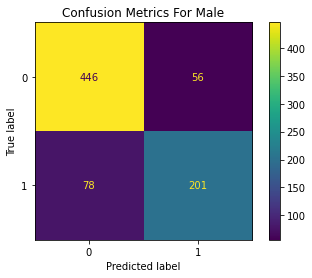

In [53]:
#Display the confusion matrix for male
cm_m = metrics.confusion_matrix(Y_test_m, test_predict_m)
TN_m, FP_m, FN_m, TP_m = cm_m.ravel()
#print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_m, FP_m, FN_m, TP_m))
disp_m = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_m)
disp_m.plot()
plt.title("Confusion Metrics For Male")
plt.show()

In [48]:
print(metrics.classification_report(Y_test_m, test_predict_m))
print("\n","="*60,"\n" )
print(f"Equal Accuracy for male: {(TN_m+TP_m)/(TP_m+FP_m+TN_m+FN_m):.3f}")
print(f"Demographic Parity for male: {(FP_m+TP_m)/(TP_m+FP_m+TN_m+FN_m):.3f}")
print(f"Equal Opportunity for male: {TP_m/(TP_m+FN_m):.3f}")

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       502
         1.0       0.78      0.72      0.75       279

    accuracy                           0.83       781
   macro avg       0.82      0.80      0.81       781
weighted avg       0.83      0.83      0.83       781



Equal Accuracy for male: 0.828
Demographic Parity for male: 0.329
Equal Opportunity for male: 0.720


In [49]:
# Calculate the accuracy, precision and recall from the male confusion matrix
calculated_accuracy = (TP_m+TN_m)/(TP_m+TN_m+FP_m+FN_m)
calculated_precision = (TP_m)/(TP_m+FP_m)
calculated_recall = (TP_m)/(TP_m+FN_m)
calculated_f1_score = 2*((calculated_precision*calculated_recall)/(calculated_precision+calculated_recall))
print(f"Calculated accuracy =  {calculated_accuracy:.3f}")
print(f"Calculated precision = {calculated_precision:.3f}")
print(f"Calculated recall =  {calculated_recall:.3f}")
print(f"Calculated f1 =  {calculated_f1_score:.3f}")

Calculated accuracy =  0.828
Calculated precision = 0.782
Calculated recall =  0.720
Calculated f1 =  0.750


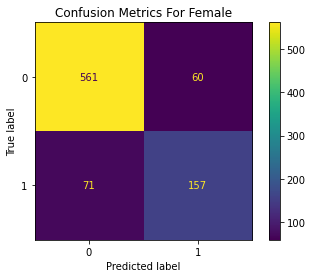

In [54]:
#Display the confusion matrix for female
cm_f = metrics.confusion_matrix(Y_test_f, test_predict_f)
TN_f, FP_f, FN_f, TP_f = cm_f.ravel()
#print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN_f, FP_f, FN_f, TP_f))
disp_f = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_f)
disp_f.plot()
plt.title("Confusion Metrics For Female")
plt.show()

In [51]:
print(metrics.classification_report(Y_test_f, test_predict_f))
print("\n","="*60,"\n" )
print(f"Equal Accuracy for female: {(TN_f+TP_f)/(TP_f+FP_f+TN_f+FN_f):.3f}")
print(f"Demographic Parity for female: {(FP_f+TP_f)/(TP_f+FP_f+TN_f+FN_f):.3f}")
print(f"Equal Opportunity for female: {TP_f/(TP_f+FN_f):.3f}")

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       621
         1.0       0.72      0.69      0.71       228

    accuracy                           0.85       849
   macro avg       0.81      0.80      0.80       849
weighted avg       0.84      0.85      0.84       849



Equal Accuracy for female: 0.846
Demographic Parity for female: 0.256
Equal Opportunity for female: 0.689


In [52]:
# Calculate the accuracy, precision and recall from the female confusion matrix
calculated_accuracy_f = (TP_f+TN_f)/(TP_f+TN_f+FP_f+FN_f)
calculated_precision_f = (TP_f)/(TP_f+FP_f)
calculated_recall_f = (TP_f)/(TP_f+FN_f)
calculated_f1_score_f = 2*((calculated_precision*calculated_recall)/(calculated_precision+calculated_recall))
print(f"Calculated accuracy =  {calculated_accuracy_f:.3f}")
print(f"Calculated precision = {calculated_precision_f:.3f}")
print(f"Calculated recall =  {calculated_recall_f:.3f}")
print(f"Calculated f1 =  {calculated_f1_score_f:.3f}")

Calculated accuracy =  0.846
Calculated precision = 0.724
Calculated recall =  0.689
Calculated f1 =  0.750
